Activation Function Plot
====================

matplotlib 와 numpy를 이용하여 활성화 함수 그래프 그리기
-----------
 활성화 함수는 가중치와 곱해저 다음 레이어로 전달 할 때 수행하는 수학적인 게이트 입니다. 각 뉴런의 결과를 0과 1 또는 -1과 1사이로 일반화를 하며 복잡한 데이터를 학습하는 것을 도와주는 역활을 합니다. 그럼 어떤 활성화 함수가 있고 장단점과 어떤 상황에서 사용하는지 알아보도록 하겠습니다.

### Binart Step Activation Function 
$$f(x)= if x < 0 : 0$$ 
$$else : 1$$
#### 0 보다 작으면 0 아니면 1로 활성화를 한다.
##### 단점
 - 다중 출력이 불가능
 - 미분이 불가능

In [2]:
import torch
from torch import nn
import torch.nn.functional as F
import torchvision

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def step_function(x) : 
    if x > 0 :
        return 1
    else : 
        return 0

def step_function_np(x) : 
    y = x > 0
    return y.astype(np.int)

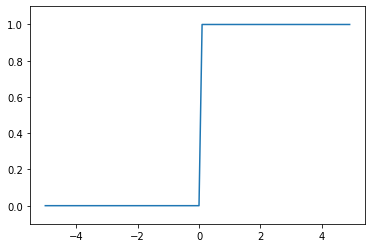

In [5]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격의 numpy array 생성
y = step_function_np(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()


### Sigmoid Function
$$f(x)= {e^x \over e^x+1}$$
#### sigmoid 함수는 함수값을 [0, 1]로 제한시킨다.
##### 장점
 - 입력에 따라 값이 급격하게 변하는 것을 방지
 - 출력값이 0과 1사이로 제한됨으로써 정규화
 - exploding gradient를 방지
 - 결과값이 깔끔하다. 값이 양 끝단에 가까울수록 0과 1에 수렴

##### 단점
 - vanishing gradient 문제 발생 sigmoid 함수의 gradient 값은 $x=0$일때 가장 크며, $|x|$가 클수록 gradient는 0에 수렴. 이는 이전의 gradient와 local gradient를 곱해서 에러를 전파하는 backprop의 특성에 의해 그 뉴런에 흐르는 gradient가 사라져버릴(vanishing) 위험 존재
 - 함수의 중심 값이 0이 아님. 

In [2]:
import numpy as np
def sigmoid(x) :
    return 1 / (1+np.exp(-x))

x = np.array([-10.0,-1.0, 1.0, 2.0,3.0,11.0])

sigmoid(x)

array([4.53978687e-05, 2.68941421e-01, 7.31058579e-01, 8.80797078e-01,
       9.52574127e-01, 9.99983299e-01])

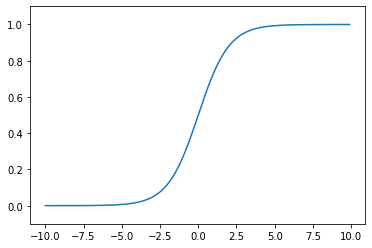

In [4]:
from matplotlib import pyplot as plt
x = np.arange(-10.0,10.0,0.1)
plt.plot(x, sigmoid(x))
plt.ylim(-0.1,1.1)
plt.show()

### tanh Function
$$f(x)= {tanh(x)=2 \sigma (2x)−1}$$
#### tanh함수는 함수값을 [-1, 1]로 제한시킨다. sigmoid함수와 비슷하지만 중심값이 0으로 학습이 더 안정적이다.

In [5]:
def tanh(x, diff=False):
    if diff:
        return (1+tanh(x))*(1-tanh(x))
    else:
        return np.tanh(x)
x = np.array([-1.0, 1.0, 2.0])

tanh(x)

array([-0.76159416,  0.76159416,  0.96402758])

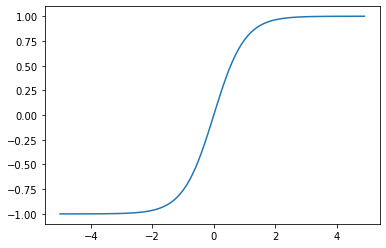

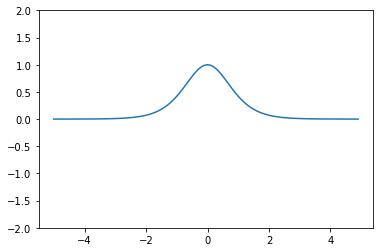

In [6]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격의 numpy array 생성
y = tanh(x)

plt.plot(x,y)
plt.ylim(-1.1,1.1)
plt.show()
y_diff = tanh(x,diff=True)
plt.plot(x,y_diff)
plt.ylim(-2.,2.)
plt.show()


### ReLu Function
$$f(x)= if x < 0 : 0$$ 
$$else : x$$
#### 0 보다 작을 때는 0으로 0보다 클때는 값 그대로를 출력한다.
 ##### 단점
 - 뉴런들이 “죽는”(die) 경우가 발생. $x<0$ 일 때 기울기가 0이기 때문에 만약 입력값이 0보다 작다면 뉴런이 죽어버릴 수 있으며, 더이상 값이 업데이트 되지 않음.

In [6]:
def relu(x) : 
    return np.maximum(0, x)

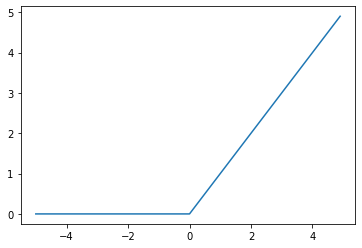

In [7]:
x = np.arange(-5.0,5.0,0.1)
plt.plot(x, relu(x))
plt.show()

### Leaky ReLu Function
$$f(x)=max(0.01x,x)$$

Leaky ReLU는 “dying ReLU” 현상을 해결하기 위해 제시된 함수이다. ReLU는 x<0인 경우 항상 함수값이 0이지만, Leaky ReLU는 작은 기울기를 부여한다. 몇몇 경우에 이 함수를 이용하여 성능 향상이 일어났다는 보고가 있지만, 모든 경우에 그렇진 않다.

In [16]:
def leaky_relu(x) : 
    return np.maximum(0.01*x, x)

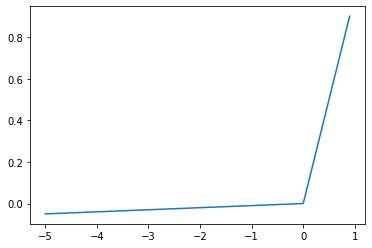

In [18]:
x = np.arange(-5.0,1.0,0.1)
plt.plot(x, leaky_relu(x))
plt.show()